In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
acidities = pd.read_csv("./ass1_data/data/q1/linearX.csv")
densities = pd.read_csv("./ass1_data/data/q1/linearY.csv") 

In [4]:
def normalize(arr):
    mean = arr.mean()
    # print(mean) 
    # variance = acid_arr.var() 
    std_dev = arr.std()  
    arr = (arr - mean)/std_dev  
    return arr 

In [5]:

acid_arr = acidities["Acidities"].to_numpy()
acid_arr = normalize(acid_arr) 
# print(acid_arr) 

acidities["Intercept"] = 1 
cols = acidities.columns.to_list() 
cols = cols[1:] + cols[:1] 
acidities = acidities[cols]   
acidities["Acidities"] = acid_arr
# print(acidities) 

density_arr = densities["Densities"].to_numpy() 
density_arr = normalize(density_arr)
densities["Densities"] = density_arr 


In [6]:
def compute_error(theta, X, Y):
    Z = np.matmul(X, theta) - Y 
    m = Y.size
    return (np.matmul(np.transpose(Z), Z))/(2*m) 

In [7]:
def compute_gradient(theta , X, Y) : 
    Z = Y - np.matmul(X, theta) 
    # print(Z)
    gradient = np.zeros(theta.size) 
    for j in range(theta.size):
        X_j = X[:, j] 
        gradient[j] = np.sum(Z * X_j)
    # gradient = np.sum( Z * X , axis = 0)
    # print(gradient)  
    return gradient 

In [33]:
dim = 2 
theta = np.zeros(dim) 
X = acidities.to_numpy()  
Y = density_arr 

learning_param = 0.001 

inv = np.linalg.inv(np.matmul(np.transpose(X), X)) 
actual_theta = np.matmul(np.matmul(inv, np.transpose(X)), Y) 

no_of_iterations = 0
# initial_error = compute_error(theta, X, Y) 
# error = initial_error 
# epsilon = 0.0000001 * initial_error 
# prev_error = 2*initial_error # some large value initially   


current_grad = compute_gradient(theta, X, Y) 
epsilon = 0.001 * np.linalg.norm(current_grad) 
while (np.linalg.norm(current_grad) > epsilon):
       # prev_error = error 
       current_grad = compute_gradient(theta, X, Y )
       theta = theta + learning_param * current_grad 
       # error = compute_error(theta, X,Y) 
       # print("error is", error)  
       print("current theta is", theta ) 
       no_of_iterations += 1 

print("gradient descent result is",theta)
print("actual theta is", actual_theta)  
print(f"no of iterations is {no_of_iterations}") 

current theta is [-5.96590138e-15  6.55064426e-02]
current theta is [-1.13437940e-14  1.24462241e-01]
current theta is [-1.61815908e-14  1.77522460e-01]
current theta is [-2.05383002e-14  2.25276656e-01]
current theta is [-2.44616619e-14  2.68255433e-01]
current theta is [-2.79957238e-14  3.06936333e-01]
current theta is [-3.11767070e-14  3.41749142e-01]
current theta is [-3.40419706e-14  3.73080670e-01]
current theta is [-3.66209910e-14  4.01279046e-01]
current theta is [-3.89425228e-14  4.26657584e-01]
current theta is [-4.10315740e-14  4.49498268e-01]
current theta is [-4.29119865e-14  4.70054884e-01]
current theta is [-4.46067974e-14  4.88555838e-01]
current theta is [-4.61327435e-14  5.05206697e-01]
current theta is [-4.75035358e-14  5.20192470e-01]
current theta is [-4.87401022e-14  5.33679666e-01]
current theta is [-4.98533784e-14  5.45818142e-01]
current theta is [-5.08571865e-14  5.56742770e-01]
current theta is [-5.17609081e-14  5.66574936e-01]
current theta is [-5.25743685e-

## plotting  the data

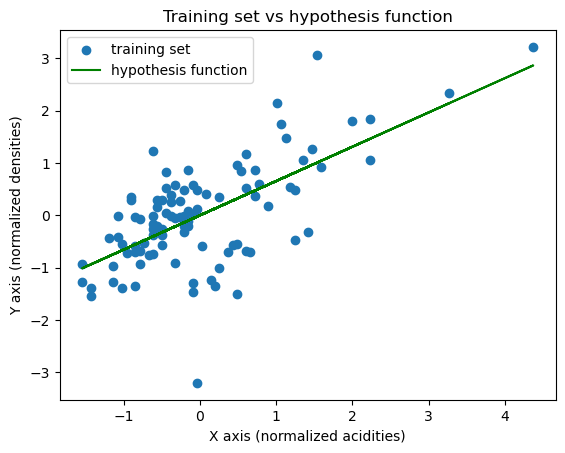

In [34]:
plt.scatter(acid_arr, Y, label = "training set") 
plt.title("Training set vs hypothesis function")

H_theta = np.matmul(  acidities, theta ) 
# label = "slope = " + str(theta[1]) + "\n intercept = " + str(theta[0]) 
plt.plot(acid_arr, H_theta, label = "hypothesis function", color = "green") 

plt.xlabel("X axis (normalized acidities)") 
plt.ylabel("Y axis (normalized densities)" )

plt.legend()
plt.show()

## 3D mesh plot of error function

In [ ]:
theta_x = np.arange(-1 , 1, 0.01) 
theta_y = np.arange(-1 , 1, 0.01) 
X_mesh, Y_mesh = np.meshgrid(theta_x, theta_y) 

X_row, X_col = X_mesh.shape
Y_row, Y_col = Y_mesh.shape 

error_surface = np.zeros((X_row, X_col))  
print(X) 

for i in range(X_row):
    for j in range(X_col):
        temp_theta = np.array([i, j])  
        error_surface[i,j] = compute_error(temp_theta, X, Y) 


[[ 1.          0.60239429]
 [ 1.         -0.03598116]
 [ 1.          0.60239429]
 [ 1.          0.19615537]
 [ 1.         -0.67435661]
 [ 1.         -0.21008356]
 [ 1.          4.37461286]
 [ 1.         -0.44222008]
 [ 1.         -0.61632248]
 [ 1.         -0.50025422]
 [ 1.          1.18273561]
 [ 1.          1.99521345]
 [ 1.         -0.55828835]
 [ 1.          1.12470147]
 [ 1.          0.48632602]
 [ 1.         -0.09401529]
 [ 1.         -1.42880033]
 [ 1.         -1.0225614 ]
 [ 1.         -0.79042488]
 [ 1.          1.356838  ]
 [ 1.          0.2541895 ]
 [ 1.         -0.38418595]
 [ 1.         -1.0225614 ]
 [ 1.         -1.54486859]
 [ 1.          0.48632602]
 [ 1.          0.77649668]
 [ 1.         -0.32615182]
 [ 1.          2.22734998]
 [ 1.         -0.15204943]
 [ 1.         -0.38418595]
 [ 1.          1.58897453]
 [ 1.          1.24076974]
 [ 1.         -1.08059553]
 [ 1.         -0.21008356]
 [ 1.          3.27196435]
 [ 1.         -0.03598116]
 [ 1.         -0.79042488]
 

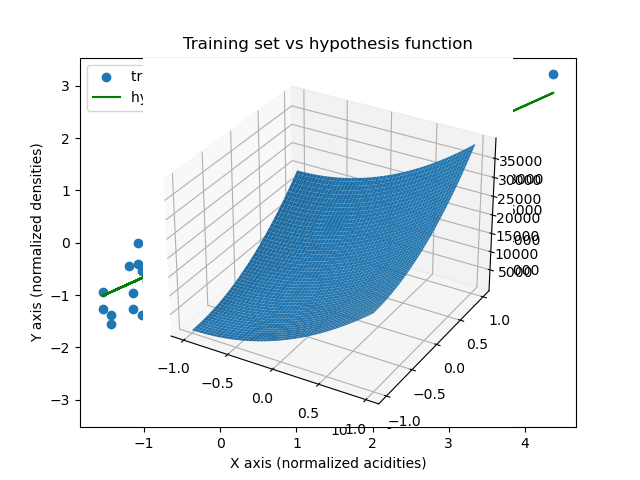

In [ ]:
%matplotlib ipympl  

ax = plt.axes(projection = "3d") 
ax.plot_surface(X_mesh, Y_mesh, error_surface)   

plt.show()